# Notebook that explore the LMC orbital histories

In [51]:
%pylab inline
import matplotlib as mpl
from pygadgetreader import *
from mpl_toolkits.mplot3d import Axes3D

font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


## To-Do:

1. Check which ones are the good simulations.
2. Organize those simulations on el gato. (jngaravitoc/MWLMC_sims/)
3. Check 100M sims disk COM. (Wait for the results of CM_method_description).
4. Table with the summaries of the simulations.


|`Simulation`| `ICs` | Time (Gyrs) | Coordinates (kpc $\&$ km/s)|
|--------|---------|---------|--------|
| LMC3 | r=(24.33628 277.752518 58.543234), v=(4.336299 -58.767378 -77.49269) | 1.88  | r=(-0.21$\hat{x}$, -41.45$\hat{y}$, -28.11$\hat{z}$), v=(-72.23, -263.41, 218.57) |
| LMC4 (need to be improved) | r=(25, 308, 88.6), v=(6, -37, -68.6) | 1.42 | r = (-1.23$\hat{x}$, -43.04$\hat{y}$, -26.82$\hat{z}$), v=(-58$\hat{x}$, -225.28$\hat{y}$, 226.16)$\hat{z}$ | 
| LMC5 |  r=(8.314183 211.882583 122.726527), v=(14.090038 35.727729 -71.808439)  | 2.32 | r = (-0.79$\hat{x}$, -43.96$\hat{y}$, -28.28$\hat{z}$), v=(-62.34$\hat{x}$, -239.11$\hat{y}$, 225.07)$\hat{z}$  | 
| LMC6 | r=(11.584929 247.791118 129.901859),v=(11.910111 11.210542 -77.135969) | 2.38 | r = (-1.18$\hat{x}$, -44.96$\hat{y}$, -27.3$\hat{z}$), v=(-66.8$\hat{x}$, -245.39$\hat{y}$, 229.84)$\hat{z}$ | 


|`Simulation`| Status| Inside 2 $\sigma$? |
|--------|----------|
| LMC3_40Mb1_ic20_new_orbit.txt | Done | No |
| LMC3_40Mb1_ic20_new_orbit1.txt | Done | No |
| LMC3_40Mb1_ic20_new_orbit2.txt | Done | No |
| LMC3_40Mb1_ic20_new_orbit3.txt | Done | No |
| LMC3_40Mb1_ic20_new_orbit4.txt | Done | No |
| LMC3_40Mb1_ic20_new_orbit5.txt |Done | No |
| LMC3_40Mb0_ic11_orbit.txt |  Done | yes |
| LMC4_40Mb1_ic20_orbit.txt| Done | No |
| LMC4_40Mb1_ic20_orbit_2.txt | Done | No |
| LMC4_40Mb1_ic20_orbit_3.txt | Done | No |
| LMC4_40Mb1_ic20_orbit_4.txt | Done | No |
| LMC4_40Mb0.txt|  Done  | check |
| LMC5_40Mb0_ic11_orbit.txt | Done! | Yes |
| LMC5_40Mb0_ic11_orbit2.txt |  Done | No |
| LMC5_40Mb0_ic11_orbit3.txt | Don't exist 40M simulations, this one was overwritten|
| LMC5_40Mb0_ic11_orbit4.txt | Don't exist 40M simulations, this one was overwritten|
| LMC5_40Mb0_ic11_orbit5.txt |  Done | No |
| LMC5_40Mb0_ic11_orbit6.txt |  Done | No |
| LMC6_40Mb0_ic11_orbit.txt | Done | (Almost) |
| LMC6_40Mb1_orbit_11.txt | running |


In [92]:
# Functions to reads the data from the Analytic integration
def reading_data(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    t = host[:,0] 
    # Defining galactocentric distances and velocities
    x = sat[:,1] - host[:,1] 
    y = sat[:,2] - host[:,2] 
    z = sat[:,3] - host[:,3] 

    vx = sat[:,4] - host[:,4] 
    vy = sat[:,5] - host[:,5] 
    vz = sat[:,6] - host[:,6]        

    Rgal = np.sqrt(x**2.0 + y**2.0 + z**2.0)
    Vgal = np.sqrt(vx**2.0 + vy**2.0 + vz**2.0)
    
    return t, x, y, z, vx, vy, vz, Rgal, Vgal

def ICs(Rgal, cut, x, y, z, vx, vy, vz, t):
    Rcut = np.where(Rgal>=cut)[0]
    return Rgal[Rcut[0]], x[Rcut[0]], y[Rcut[0]], z[Rcut[0]], vx[Rcut[0]], vy[Rcut[0]], vz[Rcut[0]], t[Rcut[0]]
    
def data_host(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    return host[:,1], host[:,2], host[:,3], host[:,4], host[:,5], host[:,6]

def data_sat(snap_name):
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    return sat[:,1], sat[:,2], sat[:,3], sat[:,4], sat[:,5], sat[:,6]

#Function that reads the N-body simulation orbit
def reading_Nbody(snap_name):
    data = np.loadtxt('orbits/' + snap_name)
    #time = data[:,0]
    #Rgal = data[:,1]
    x_sat= data[:,6]
    y_sat = data[:,7]
    z_sat = data[:,8]
    x_gal = data[:,0]
    y_gal = data[:,1]
    z_gal = data[:,2]
    #Vgal = data[:,8]
    vx_sat = data[:,9]
    vy_sat = data[:,10]
    vz_sat = data[:,11]
    vx_gal = data[:,3]
    vy_gal = data[:,4]
    vz_gal = data[:,5]
    Rgal= np.sqrt((x_sat-x_gal)**2 + (y_sat-y_gal)**2 + (z_sat-z_gal)**2)
    Vgal= np.sqrt((vx_sat-vx_gal)**2 + (vy_sat-vy_gal)**2 + (vz_sat-vz_gal)**2)

    return Rgal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal

    
def best_values(x, y, z, vx, vy, vz):
    """
    Computes the closes value of the N-body orbit to the observed present day LMC positions
    and velocities.
    
    """
    x_obs = -1
    y_obs = -41
    z_obs = -28
    vx_obs = -57
    vy_obs = -226
    vz_obs = 221
    Robs = np.sqrt((x_obs-x)**2.0 + (y_obs-y)**2.0 + (z_obs-z)**2.0)
    index = np.where(Robs == min(Robs))[0]
    
    sigma_vx = 13
    sigma_vy = 15
    sigma_vz = 19
    
    dx = x_obs - x[index]
    dy = y_obs - y[index]
    dz = z_obs - z[index]
    
    dvx = vx_obs - vx[index]
    dvy = vy_obs - vy[index]
    dvz = vz_obs - vz[index]
    t = np.linspace(0, 3, 151)
    print(index)
    print('Dr = ', dx, dy, dz, (dx**2 + dy**2 + dz**2)**0.5)
    print('Dv = ', dvx, dvy, dvz, (dvx**2 + dvy**2 + dvz**2)**0.5)
    print(vx[index], vy[index], vz[index])
    return t[index], x[index], y[index], z[index], vx[index], vy[index], vz[index]

def pericenter(x, y, z, vx, vy, vz):
    r_gal = np.sqrt(x**2 + y**2 + z**2)
    v_gal = np.sqrt(vx**2 + vy**2 + vz**2)
    index = np.where(r_gal == min(r_gal))[0]
    print(r_gal[index], v_gal[index], index*0.02)
    
def check_orbit(path_snap):
    """
    Function for checking fast the values of a simulation
    """
    orbit = reading_Nbody(path_snap)
    print(shape(orbit))
    R_gal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = orbit
    best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)
    plot(R_gal)
    plot(Vgal)
    

## LMC6

In [95]:
orbit = reading_Nbody('LMC6/LMC6_40Mb0_ic11_orbit.txt')
print(shape(orbit))
R_gal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = orbit
best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)
#plot(R_gal)


(14, 151)
[113]
Dr =  [ 1.041708] [ 2.699152] [-0.435855] [ 2.92584119]
Dv =  [ 28.052905] [ 22.179062] [ 3.679794] [ 35.95020381]
[-85.052905] [-248.179062] [ 217.320206]


(array([ 2.26]),
 array([-2.041708]),
 array([-43.699152]),
 array([-27.564145]),
 array([-85.052905]),
 array([-248.179062]),
 array([ 217.320206]))

(14, 151)
Dr =  [ 1.041708] [ 2.699152] [-0.435855] [ 2.92584119]
Dv =  [ 28.052905] [ 22.179062] [ 3.679794] [ 35.95020381]


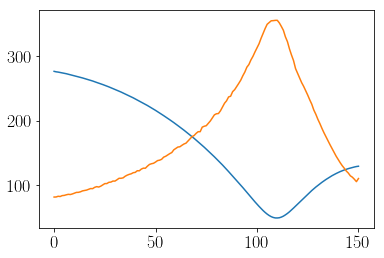

In [80]:
check_orbit('LMC6/LMC6_40Mb0_ic11_orbit.txt')
#check_orbit('LMC6/LMC6_40Mb1_orbit.txt')
#check_orbit('LMC6/LMC6_40Mb1_orbit_11.txt') # Re do orbit b=1


(14, 151)
Dr =  [ 0.42639] [ 0.667387] [-2.669268] [ 2.78427827]
Dv =  [ 0.510675] [ 24.218648] [-15.04593] [ 28.51637616]


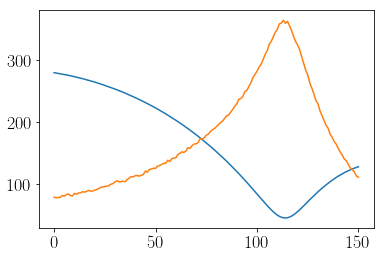

In [58]:
check_orbit('LMC6_100Mb0_orbit.txt')

## LMC5

(14, 151)
Dr =  [ 0.483961] [ 4.345995] [ 4.116013] [ 6.00528549]
Dv =  [ 17.052755] [ 20.810373] [ 7.753395] [ 27.9997002]
(14, 151)
Dr =  [ 1.136566] [ 13.191966] [ 9.337025] [ 16.20184511]
Dv =  [-1.566675] [-17.026325] [-1.976194] [ 17.21207589]
(14, 151)
Dr =  [ 0.853885] [ 7.580513] [ 6.908145] [ 10.29153848]
Dv =  [ 22.47287] [ 0.431021] [ 6.862659] [ 23.50131387]
(14, 151)
Dr =  [-0.30732] [ 5.777382] [ 8.281096] [ 10.1019374]
Dv =  [ 3.470892] [ 10.364455] [ 8.252789] [ 13.69589519]
(14, 151)
Dr =  [ 0.853885] [ 7.580513] [ 6.908145] [ 10.29153848]
Dv =  [ 22.201938] [ 4.008918] [ 6.999349] [ 23.62177726]


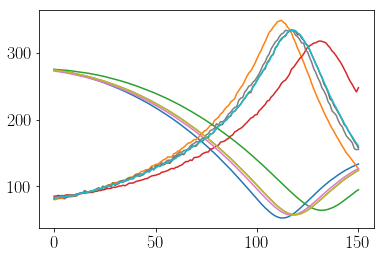

In [82]:
check_orbit('LMC5/LMC5_40Mb0_ic11_orbit6.txt') # the best so far!
check_orbit('LMC5/LMC5_40Mb0_ic11_orbit5.txt')
check_orbit('LMC5/LMC5_40Mb0_ic11_orbit4.txt')
check_orbit('LMC5/LMC5_40Mb0_ic11_orbit3.txt')
check_orbit('LMC5/LMC5_40Mb0_ic11_orbit2.txt')
#check_orbit('LMC5/LMC5_40Mb0_ic11_orbit.txt') start at 250kpc!

(14, 151)
Dr =  [ 0.359211] [-2.231368] [-0.398055] [ 2.29488202]
Dv =  [ 25.261712] [ 30.972354] [-20.454015] [ 44.89774532]


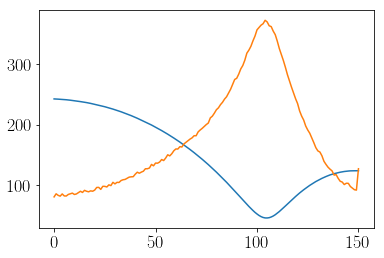

In [86]:
check_orbit('LMC5/LMC5_40Mb1_ic20_orbit.txt') # Re do orbit, double check!

(14, 151)
Dr =  [ 0.643318] [-11.86839] [-11.641382] [ 16.6371366]
Dv =  [ 7.348068] [ 55.97946] [-105.529057] [ 119.68323156]


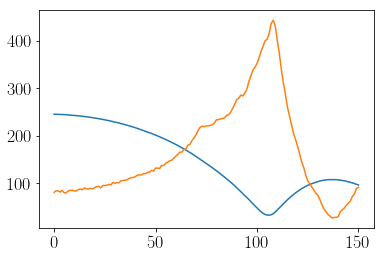

In [71]:
check_orbit('LMC5_40Mb09_new_orbit.txt') # ? Weird!

## LMC4

(14, 151)
[115]
Dr =  [-1.220231] [-1.126895] [ 2.380497] [ 2.9026922]
Dv =  [ 29.417012] [ 46.088151] [ 3.407122] [ 54.78217537]
[-86.417012] [-272.088151] [ 217.592878]


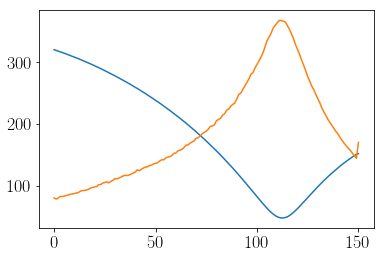

In [94]:
check_orbit('LMC4/LMC4_40Mb0.txt') # #Check with new disk VCOM

(14, 151)
[119]
Dr =  [-0.199728] [ 3.965011] [-0.776424] [ 4.04524878]
Dv =  [ 36.925285] [ 28.827389] [-22.651719] [ 52.03455969]
[-93.925285] [-254.827389] [ 243.651719]
(14, 151)
[109]
Dr =  [-0.662086] [-2.398009] [-1.834319] [ 3.09087871]
Dv =  [ 44.310653] [ 49.617607] [-17.292297] [ 68.73401217]
[-101.310653] [-275.617607] [ 238.292297]
(14, 151)
[115]
Dr =  [-1.829841] [-2.087023] [ 2.544187] [ 3.76521853]
Dv =  [ 38.575582] [ 48.473547] [-11.791845] [ 63.06193697]
[-95.575582] [-274.473547] [ 232.791845]
(14, 151)
[113]
Dr =  [-1.526892] [-2.303024] [ 1.116379] [ 2.98020482]
Dv =  [ 39.416614] [ 51.07963] [-13.125528] [ 65.84130577]
[-96.416614] [-277.07963] [ 234.125528]


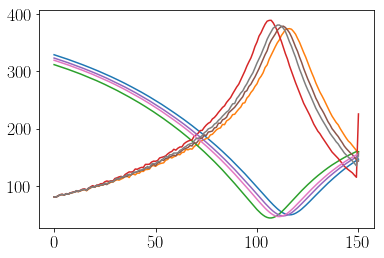

In [93]:
check_orbit('LMC4/LMC4_40Mb1_ic20_orbit_2.txt') #Check with new disk VCOM
check_orbit('LMC4/LMC4_40Mb1_ic20_orbit_3.txt')
check_orbit('LMC4/LMC4_40Mb1_ic20_orbit_4.txt')
check_orbit('LMC4/LMC4_40Mb1_ic20_orbit.txt')

|Simulation| ICs | 
|--------|---------|
| LMC3_H10 |  | 
| LMC4_H0 | r=(20.392142 266.90138 82.252445), v=(7.370204 -32.65387 7.370204) | 
| LMC4_H1 | r=(15.938147 184.318269 43.330524), v=(10.949636 -22.197442 -99.102962) | 
| LMC4_H2 | r=(15.255384 191.783586 54.76852), v=(11.616064 -11.796171 -94.946403) | 
| LMC4_H3 | r=(14.537944 198.811104 66.078902), v=(12.088886 -2.755792 -90.558497)  | 
| LMC4_H4 | r=(13.810617 205.552718 77.212577), v=(12.40013 5.042759 -86.069407) | 
| LMC5_H1 | r=(8.314183 211.882583 122.726527), v=(14.090038 35.727729 -71.808439)  | 
| LMC6_H1 | r=(11.584929 247.791118 129.901859), v=(11.910111 11.210542 -77.135969)  | 


## LMC3 

(14, 151)
Dr =  [-0.76477] [ 2.331094] [ 2.74644] [ 3.68263561]
Dv =  [ 21.227024] [ 37.166301] [ 7.346508] [ 43.42685411]


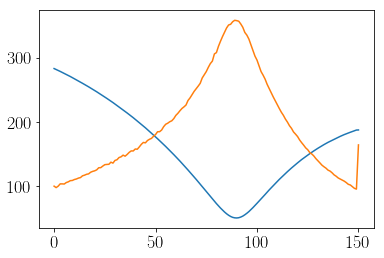

In [77]:
check_orbit('LMC3/LMC3_40Mb0_ic11_orbit.txt')

(14, 151)
Dr =  [-0.918272] [ 1.183414] [ 1.062192] [ 1.83628538]
Dv =  [ 29.824641] [ 40.611681] [-10.95435] [ 51.56370456]
(14, 151)
Dr =  [-0.972915] [ 0.275122] [ 1.030586] [ 1.44373239]
Dv =  [ 32.115243] [ 43.72454] [-9.556913] [ 55.0868298]
(14, 151)
Dr =  [-0.147326] [ 2.36794] [-1.321001] [ 2.71549046]
Dv =  [ 33.460045] [ 37.62947] [-18.220866] [ 53.54952457]
(14, 151)
Dr =  [-0.882607] [ 1.036669] [ 0.993304] [ 1.68532803]
Dv =  [ 32.256632] [ 40.268773] [-11.002761] [ 52.75533278]
(14, 151)
Dr =  [-1.055707] [ 0.381241] [ 1.10928] [ 1.57808875]
Dv =  [ 33.814119] [ 45.887688] [-8.911202] [ 57.69301582]


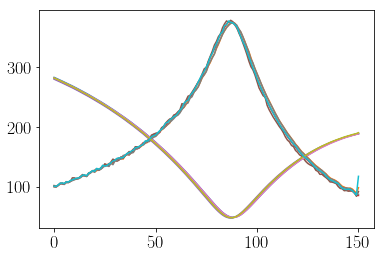

In [85]:
check_orbit('LMC3/LMC3_40Mb1_ic20_new_orbit1.txt') ## the best so far!  Check with new disk VCOM
check_orbit('LMC3/LMC3_40Mb1_ic20_new_orbit2.txt')
check_orbit('LMC3/LMC3_40Mb1_ic20_new_orbit3.txt')
check_orbit('LMC3/LMC3_40Mb1_ic20_new_orbit4.txt')
check_orbit('LMC3/LMC3_40Mb1_ic20_new_orbit5.txt')

## paper plots

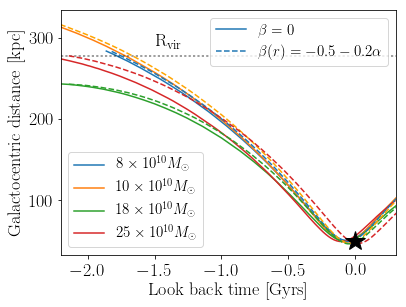

In [50]:
figure(figsize=(6,4.5))


l1, = plot(np.linspace(0, 3, 151)-1.86, R_gal3, label=r'$8 \times 10^{10} M_{\odot}$')
plot(np.linspace(0, 3, 151)-2.32, R_gal4, label=r'$10 \times 10^{10} M_{\odot}$')
plot(np.linspace(0, 3, 151)-2.24, R_gal5, label=r'$18 \times 10^{10} M_{\odot}$')
plot(np.linspace(0, 3, 151)-2.3, R_gal6, label=r'$25 \times 10^{10} M_{\odot}$')

xlim(-2.2, 0.3)
axhline(278, ls=':', c='k', alpha=0.5)
text(-1.5, 285, '$\mathrm{R_{vir}}$', fontsize=18)

xlabel('Look\ back\ time\ [Gyrs]', fontsize=18)
ylabel('Galactocentric\ distance\ [kpc]', fontsize=18)

#plot(np.linspace(0, 3, 151)-1.82, R_gal3_b09, label=r'$8 \times 10^{10} M_{\odot}$', ls='--', c='k', lw=2.5)
l2, = plot(np.linspace(0, 3, 151)-1.82, R_gal3_b1, ls='--', c='#1f77b4')
#plot(np.linspace(0, 3, 151)-2.26, R_gal4_b09, label=r'$18 \times 10^{10} M_{\odot}$', ls=':', c='k', lw=2.5)
plot(np.linspace(0, 3, 151)-2.26, R_gal4_b1, ls='--', c='orange')
#plot(np.linspace(0, 3, 151)-2.14, R_gal5_b09, label=r'$18 \times 10^{10} M_{\odot}$', c='b', lw=1)
plot(np.linspace(0, 3, 151)-2.14, R_gal5_b1, ls='--', c='#2ca02c')
plot(np.linspace(0, 3, 151)-2.14, R_gal6_b1, ls='--', c='#d62728')

plot_lines = []
plot_lines.append([l1, l2])

plot(0, 49.65, '*', c='k', markersize=20)

legend1 = pyplot.legend(plot_lines[0], [r"$\beta=0$", r"$\beta(r)=-0.5-0.2 \alpha$"],
                       loc='upper right', fontsize=15)
pyplot.gca().add_artist(legend1)
plt.legend(fontsize=15)

savefig('../../../MW_anisotropy/figures/LMC_orbits.pdf', bbox_inches='tight', dpi=300)
savefig('../../../MW_anisotropy/figures/LMC_orbits.png', bbox_inches='tight', dpi=300)


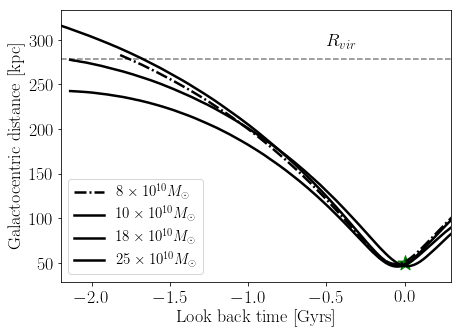

In [33]:
figure(figsize=(7,5))


#plot(np.linspace(0, 3, 151)-1.82, R_gal3_b09, label=r'$8 \times 10^{10} M_{\odot}$', ls='--', c='k', lw=2.5)
plot(np.linspace(0, 3, 151)-1.82, R_gal3_b1, label=r'$8 \times 10^{10} M_{\odot}$', ls='-.', c='k', lw=2.5)
#plot(np.linspace(0, 3, 151)-2.26, R_gal4_b09, label=r'$18 \times 10^{10} M_{\odot}$', ls=':', c='k', lw=2.5)
plot(np.linspace(0, 3, 151)-2.26, R_gal4_b1, label=r'$10 \times 10^{10} M_{\odot}$', c='k', lw=2.5)
#plot(np.linspace(0, 3, 151)-2.14, R_gal5_b09, label=r'$18 \times 10^{10} M_{\odot}$', c='b', lw=1)
plot(np.linspace(0, 3, 151)-2.14, R_gal5_b1, label=r'$18 \times 10^{10} M_{\odot}$', c='k', lw=2.5)
plot(np.linspace(0, 3, 151)-2.14, R_gal6_b1, label=r'$25 \times 10^{10} M_{\odot}$', c='k', lw=2.5)

xlim(-2.2, 0.3)
axhline(278, ls='--', c='k', alpha=0.5)
text(-0.5, 290, '$R_{vir}$', fontsize=18)

plt.scatter(0, 49.65, s=250, marker='*', c='green')
legend(fontsize=15)
xlabel('Look\ back\ time\ [Gyrs]', fontsize=18)
ylabel('Galactocentric\ distance\ [kpc]', fontsize=18)


In [20]:
## Peris  r_peri = 48.2 \pm 2.5  Salem 2015.

print(min(R_gal6)-48.2, min(R_gal5)-48.2, min(R_gal4)-48.2, min(R_gal3)-48.2)

-0.340324706044 0.0993320421771 -3.02808076611 -0.193182045483


[ 1.48043769  1.47944949  1.47882229  1.47808676  1.4773326   1.47657939
  1.47576568  1.47500832  1.47415115  1.47324766  1.47259474  1.47157472
  1.47095133  1.47001184  1.46907664  1.46816309  1.46744411  1.46670114
  1.46581509  1.46499457  1.46401122  1.46308129  1.46239956  1.46150929
  1.46053428  1.45947592  1.45850939  1.4574788   1.45691524  1.45605777
  1.45521896  1.45408007  1.45314545  1.4519868   1.45113717  1.44986239
  1.44863149  1.44739001  1.44634414  1.44537737  1.44424726  1.44326318
  1.44188202  1.44074482  1.43958723  1.438592    1.43720809  1.43598795
  1.43459673  1.43344395  1.43212503  1.43075548  1.42946603  1.42802675
  1.42660739  1.42520268  1.42381327  1.42214574  1.42059832  1.41921159
  1.41739726  1.41572566  1.41406117  1.41230162  1.41046904  1.40875943
  1.40656317  1.40479603  1.40298706  1.40094271  1.39873307  1.39626899
  1.39402935  1.39197076  1.38976829  1.38695518  1.38403704  1.38155808
  1.37841934  1.37582739  1.3728479   1.369385    1

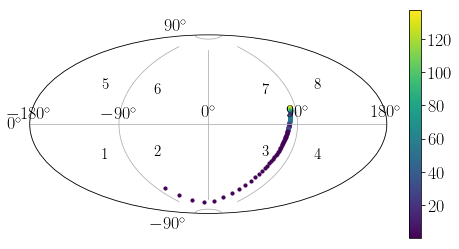

In [64]:
from astropy.coordinates import SkyCoord
from astropy import units as u

norm = matplotlib.colors.Normalize(vmin=min(R_gal6),vmax=max(R_gal6))
c_m = matplotlib.cm.viridis
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])


c_gal = SkyCoord(x=(x_sat[:113]-x_gal[:113])*u.kpc,
                 y=(y_sat[:113]-y_gal[:113])*u.kpc,
                 z=(z_sat[:113]-z_gal[:113])*u.kpc, representation='cartesian',
                 frame='galactocentric')

c_gal.representation = 'spherical'


## to degrees and range of l.

l_degrees = c_gal.lon.wrap_at(180 * u.deg).radian
#l_degrees = c_gal.l.radian
b_degrees = c_gal.lat.radian
fig = plt.figure(figsize=(8,4.2))
ax = fig.add_subplot(111, projection="aitoff")
print(l_degrees)
for i in range(0, 113):
    ax.scatter(l_degrees[i], b_degrees[i], c=s_m.to_rgba(R_gal6[i]) , s=10)
colorbar(s_m)

ax.xaxis.set_ticks([-np.pi, -np.pi/2., 0, np.pi/2., np.pi])
ax.xaxis.set_ticks([-np.pi, -3*np.pi/4., -np.pi/2., -np.pi/4.\
                    ,0, np.pi/4. ,np.pi/2., 3*np.pi/4., np.pi],\
                    minor=True)

ax.yaxis.set_ticks([ -np.pi/2.1, 0, np.pi/2.1])

ax.yaxis.set_ticks([ -np.pi/2.1, -np.pi/4., 0, np.pi/4.,\
                     np.pi/2.1], minor=True)

ax.text(-np.pi/1.5, np.pi/6., '$5$', fontsize=15, color='k')
ax.text(-np.pi/3., np.pi/6., '$6$', fontsize=15, color='k')
ax.text(np.pi/3., np.pi/6., '$7$', fontsize=15, color='k')
ax.text(np.pi/1.5, np.pi/6., '$8$', fontsize=15, color='k')
ax.text(-np.pi/1.5, -np.pi/6., '$1$', fontsize=15, color='k')
ax.text(-np.pi/3., -np.pi/6., '$2$', fontsize=15, color='k')
ax.text(np.pi/3, -np.pi/6., '$3$', fontsize=15, color='k')
ax.text(np.pi/1.5, -np.pi/6., '$4$', fontsize=15, color='k')
#ax.yaxis.set_ticks([ -np.pi/2.1, 0, np.pi/2.1])
#ax.yaxis.set_ticks([ -np.pi/2.1, 0, np.pi/2.1])
#ax.yaxis.set_ticks([ -np.pi/2.1, 0, np.pi/2.1])
ax.grid(which='major')
savefig('../../../MW_anisotropy/figures/LMC_orbit_aitoff.png', bbox_inches='tight', dpi=150)
savefig('../../../MW_anisotropy/figures/LMC_orbit_aitoff.pdf', bbox_inches='tight', dpi=150)